# Perfil de intensidad por recorte pixel E7 

Se usa camara BN DCC1545

In [1]:
# Importamos las librerias necesarias
import cv2
from PIL import Image
from pylab import * 
import numpy as np
import pandas as pd
from skimage.exposure import histogram as imhist
from skimage.color import rgb2gray 
import matplotlib.pyplot as plt

## Analisis para una sola imagen

In [2]:
# Cargamos imagen, se convierte a matriz
image = imread('../M1545/PP9.png')
# Utilizamos shape para conocer las propiedades de nuestra matriz
print(image.shape)

(1024, 1280, 4)


In [3]:
# Nos aseguramos que la imagen sea un array de NumPy
image = np.array(image)

# Verificamos si la imagen tiene 4 canales
if image.shape[-1] == 4:
    # Elimina el canal alfa
    image = image[..., :3]

In [4]:
# Convertimos la imagen a escala de grises
image = rgb2gray(image)

print(type(image))

# Shape of the image
print("Shape of the image", image.shape)

<class 'numpy.ndarray'>
Shape of the image (1024, 1280)


## Recortamos por pixel

In [5]:
# Seleccionamos la línea central de la imagen en escala de grises
linea_pixeles = image[image.shape[0] // 2, :]  # Esto selecciona la fila central

# Determinamos la posición de los puntos a seleccionar (uno central y dos a cada lado)
centro = len(linea_pixeles) // 2
offset = len(linea_pixeles) // 10  # Elegimos un offset que no esté en los bordes 

# Seleccionamos 7 puntos específicos en la línea central, incluyendo los nuevos puntos
puntos_seleccionados = [
    centro - 2 * offset,        # Punto 1: A la izquierda del centro
    centro - 1.38 * offset,      # Punto entre el 1 y el 2
    centro - offset,            # Punto 2: A la izquierda del centro
    centro,                     # Punto 3: Punto central
    centro + offset,            # Punto 4: A la derecha del centro
    centro + 1.38 * offset,      # Punto entre el 4 y el 5
    centro + 2 * offset         # Punto 5: A la derecha del centro
]

# Obtenemos las intensidades correspondientes a estos puntos
intensidades = [linea_pixeles[int(punto)] for punto in puntos_seleccionados]

# Creamos un DataFrame para mostrar las intensidades de los puntos seleccionados
df_puntos_intensidad = pd.DataFrame({
    'Pixel': puntos_seleccionados,
    'Intensidad': intensidades
})

# Mostramos el DataFrame resultante
print(df_puntos_intensidad)


    Pixel  Intensidad
0  384.00    0.568627
1  463.36    0.839216
2  512.00    0.713726
3  640.00    0.250980
4  768.00    0.235294
5  816.64    0.596078
6  896.00    0.545098


## Analisis para todas las imagenes

In [6]:
# Lista para almacenar los resultados
results = []

# Recorremos las imágenes desde B0 hasta B36
for i in range(37):
    # Formateamos el nombre de la imagen
    img_path = f'../M1545/PP{i}.png'
    # Cargamos la imagen
    image = imread(img_path)
    
    # Verificamos si la imagen tiene 4 canales y eliminamos el canal alfa si es necesario
    if image.shape[-1] == 4:
        image = image[..., :3]
    
    # Convertimos la imagen a escala de grises
    image = rgb2gray(image)
    
    # Seleccionamos la línea central de la imagen
    linea_pixeles = image[image.shape[0] // 2, :]  # Esto selecciona la fila central

    # Determinamos la posición de los puntos a seleccionar (uno central y dos a cada lado)
    centro = len(linea_pixeles) // 2
    offset = len(linea_pixeles) // 10  # Elegimos un offset que no esté en los bordes

    # Seleccionamos 7 puntos específicos en la línea central, incluyendo los nuevos puntos
    puntos_seleccionados = [
        centro - 2 * offset,        # Punto 1: A la izquierda del centro
        centro - 1.65 * offset,      # Punto entre el 1 y el 2
        centro - offset,            # Punto 2: A la izquierda del centro
        centro,                     # Punto 3: Punto central
        centro + offset,            # Punto 4: A la derecha del centro
        centro + 1.65 * offset,      # Punto entre el 4 y el 5
        centro + 2 * offset         # Punto 5: A la derecha del centro
    ]

    # Obtenemos las intensidades correspondientes a estos puntos
    intensidades = [linea_pixeles[int(punto)] for punto in puntos_seleccionados]

    # Guardamos los resultados en la lista
    results.append({
        'Image': f'B{i}.png',
        'Pixel 1': intensidades[0],
        'Pixel entre 1 y 2': intensidades[1],
        'Pixel 2': intensidades[2],
        'Pixel 3': intensidades[3],
        'Pixel 4': intensidades[4],
        'Pixel entre 4 y 5': intensidades[5],
        'Pixel 5': intensidades[6]
    })

# Convertimos los resultados a un DataFrame
df_results = pd.DataFrame(results)

# Mostramos el DataFrame resultante
print(df_results)


      Image   Pixel 1  Pixel entre 1 y 2   Pixel 2   Pixel 3   Pixel 4  \
0    B0.png  0.003922           0.003922  0.003922  0.007843  0.003922   
1    B1.png  0.035294           0.011765  0.027451  0.019608  0.031373   
2    B2.png  0.137255           0.047059  0.152941  0.039216  0.094118   
3    B3.png  0.309804           0.098039  0.278431  0.070588  0.180392   
4    B4.png  0.525490           0.176471  0.333333  0.082353  0.192157   
5    B5.png  0.654902           0.270588  0.462745  0.047059  0.258824   
6    B6.png  0.392157           0.482353  0.564706  0.090196  0.450980   
7    B7.png  0.435294           0.792157  0.835294  0.168627  0.266667   
8    B8.png  0.513726           0.670588  0.925490  0.313726  0.274510   
9    B9.png  0.568627           1.000000  0.713726  0.250980  0.235294   
10  B10.png  0.443137           0.984314  0.580392  0.525490  0.286275   
11  B11.png  0.411765           0.592157  0.611765  0.662745  0.611765   
12  B12.png  0.392157           0.6549

<function matplotlib.pyplot.show(close=None, block=None)>

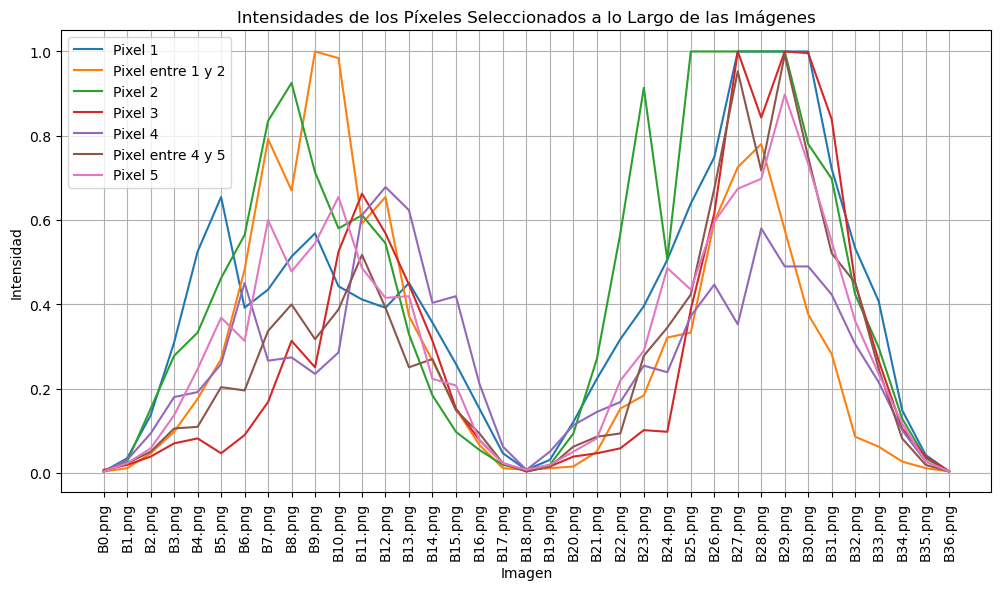

In [7]:
# Graficamos los resultados
plt.figure(figsize=(12, 6))

# Recorremos todas las columnas relevantes en df_results para graficar los 7 puntos
for column in df_results.columns[1:]:
    plt.plot(df_results['Image'], df_results[column], label=column)

plt.xlabel('Imagen')
plt.ylabel('Intensidad')
plt.title('Intensidades de los Píxeles Seleccionados a lo Largo de las Imágenes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.show


## Analisis para una foro en segmento promediado de pixel

In [8]:

# Lista para almacenar las intensidades promedio
promedios_intensidad = []

# Recorremos cada punto seleccionado para calcular el promedio de intensidad en un cuadrado de 5x5 píxeles
for punto in puntos_seleccionados:
    # Definimos el rango de filas y columnas para el cuadrado 5x5
    fila_inicio = max(0, (image.shape[0] // 2) - 2)
    fila_fin = min(image.shape[0], (image.shape[0] // 2) + 3)
    columna_inicio = max(0, int(punto) - 2)
    columna_fin = min(image.shape[1], int(punto) + 3)
    
    # Extraemos la región 5x5 alrededor del punto
    region = image[fila_inicio:fila_fin, columna_inicio:columna_fin]
    
    # Calculamos el promedio de intensidad en la región
    promedio_intensidad = np.mean(region)
    
    # Guardamos el promedio en la lista
    promedios_intensidad.append(promedio_intensidad)

# Creamos un DataFrame para mostrar los promedios de intensidad
df_promedios_intensidad = pd.DataFrame({
    'Pixel': ['Punto 1', 'Punto entre 1 y 2', 'Punto 2', 'Punto 3', 'Punto 4', 'Punto entre 4 y 5', 'Punto 5'],
    'Intensidad Promedio 5x5': promedios_intensidad
})

# Mostramos el DataFrame resultante
print(df_promedios_intensidad)


               Pixel  Intensidad Promedio 5x5
0            Punto 1                 0.004549
1  Punto entre 1 y 2                 0.004549
2            Punto 2                 0.004235
3            Punto 3                 0.004078
4            Punto 4                 0.004549
5  Punto entre 4 y 5                 0.004549
6            Punto 5                 0.004392


       Image   Pixel 1  Pixel entre 1 y 2   Pixel 2   Pixel 3   Pixel 4  \
0    PP0.png  0.004549           0.004392  0.004863  0.004863  0.004235   
1    PP1.png  0.029176           0.020392  0.020863  0.020549  0.028706   
2    PP2.png  0.108235           0.067922  0.094902  0.058196  0.092078   
3    PP3.png  0.224941           0.144784  0.197333  0.101333  0.206431   
4    PP4.png  0.439529           0.241412  0.253333  0.138980  0.304314   
5    PP5.png  0.577098           0.344784  0.395137  0.140549  0.395765   
6    PP6.png  0.542588           0.515451  0.492549  0.220549  0.556549   
7    PP7.png  0.536784           0.627608  0.682353  0.270118  0.483137   
8    PP8.png  0.639059           0.663843  0.732706  0.345255  0.528314   
9    PP9.png  0.693020           0.756549  0.703843  0.298353  0.465726   
10  PP10.png  0.559059           0.761725  0.668078  0.501176  0.512784   
11  PP11.png  0.565804           0.635451  0.703372  0.501804  0.526118   
12  PP12.png  0.429333   

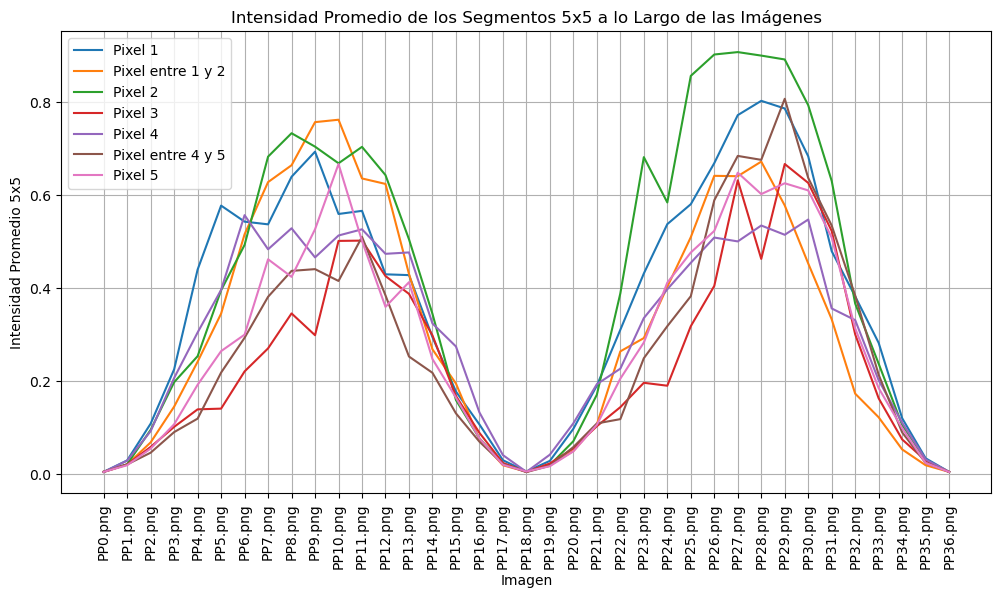

In [9]:
# Lista para almacenar los resultados
results = []

# Recorremos las imágenes desde B0 hasta B36
for i in range(37):
    # Formateamos el nombre de la imagen
    img_path = f'../M1545/PP{i}.png'
    # Cargamos la imagen
    image = imread(img_path)
    
    # Verificamos si la imagen tiene 4 canales y eliminamos el canal alfa si es necesario
    if image.shape[-1] == 4:
        image = image[..., :3]
    
    # Convertimos la imagen a escala de grises
    image = rgb2gray(image)
    
    # Seleccionamos la línea central de la imagen en escala de grises
    linea_pixeles = image[image.shape[0] // 2, :]  # Esto selecciona la fila central

    # Determinamos la posición de los puntos a seleccionar (uno central y dos a cada lado)
    centro = len(linea_pixeles) // 2
    offset = len(linea_pixeles) // 10  # Elegimos un offset que no esté en los bordes

    # Seleccionamos 7 puntos específicos en la línea central
    puntos_seleccionados = [
        centro - 2 * offset,        # Punto 1: A la izquierda del centro
        centro - 1.65 * offset,      # Punto entre el 1 y el 2
        centro - offset,            # Punto 2: A la izquierda del centro
        centro,                     # Punto 3: Punto central
        centro + offset,            # Punto 4: A la derecha del centro
        centro + 1.65 * offset,      # Punto entre el 4 y el 5
        centro + 2 * offset         # Punto 5: A la derecha del centro
    ]

    # Lista para almacenar las intensidades promedio de los segmentos 5x5
    promedios_intensidad = []

    # Recorremos cada punto seleccionado para calcular el promedio de intensidad en un cuadrado de 5x5 píxeles
    for punto in puntos_seleccionados:
        # Definimos el rango de filas y columnas para el cuadrado 5x5
        fila_inicio = max(0, (image.shape[0] // 2) - 2)
        fila_fin = min(image.shape[0], (image.shape[0] // 2) + 3)
        columna_inicio = max(0, int(punto) - 2)
        columna_fin = min(image.shape[1], int(punto) + 3)
        
        # Extraemos la región 5x5 alrededor del punto
        region = image[fila_inicio:fila_fin, columna_inicio:columna_fin]
        
        # Calculamos el promedio de intensidad en la región
        promedio_intensidad = np.mean(region)
        
        # Guardamos el promedio en la lista
        promedios_intensidad.append(promedio_intensidad)

    # Guardamos los resultados en la lista
    results.append({
        'Image': f'PP{i}.png',
        'Pixel 1': promedios_intensidad[0],
        'Pixel entre 1 y 2': promedios_intensidad[1],
        'Pixel 2': promedios_intensidad[2],
        'Pixel 3': promedios_intensidad[3],
        'Pixel 4': promedios_intensidad[4],
        'Pixel entre 4 y 5': promedios_intensidad[5],
        'Pixel 5': promedios_intensidad[6]
    })

# Convertimos los resultados a un DataFrame
df_results = pd.DataFrame(results)

# Mostramos el DataFrame resultante
print(df_results)

# Graficamos los resultados
plt.figure(figsize=(12, 6))

# Recorremos todas las columnas relevantes en df_results para graficar los 7 puntos
for column in df_results.columns[1:]:
    plt.plot(df_results['Image'], df_results[column], label=column)

plt.xlabel('Imagen')
plt.ylabel('Intensidad Promedio 5x5')
plt.title('Intensidad Promedio de los Segmentos 5x5 a lo Largo de las Imágenes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.show()
